# Driver Behavior Clustering: Multi-Race Exploratory Data Analysis

This notebook performs an enhanced EDA on telemetry data for the 2023 Monaco, Monza, and Silverstone Grands Prix for drivers (Verstappen, Leclerc, Alonso). It includes sector breakdowns, derived metrics, annotated visualizations, and summary tables to deepen insights into driver behavior variability.

## Objectives 
- Load and preprocess telemetry data for multiple races using FastF1.
- Extract lap times, sector times, and telemetry signals (speed, throttle, brake, RPM, DRS).
- Compute derived metrics ( % lap at >95% throttle, brake duration per km, speed std dev per sector).
- Visualize driver inputs with annotations for domain insights.
- Generate summary tables for driver comparisons.
- Link findings to Phase 2 feature engineering.

In [32]:

# Import libraries
import fastf1 as ff1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fastf1 import plotting

# Enable FastF1 cache
ff1.Cache.enable_cache('../cache')

# Set plotting style (fix seaborn deprecation)
plt.style.use('seaborn-v0_8')
ff1.plotting.setup_mpl(color_scheme='fastf1', misc_mpl_mods=False)

# Define races and session type
races = [
    {'year': 2023, 'name': 'Monaco', 'session_type': 'R'},
    {'year': 2023, 'name': 'Monza', 'session_type': 'R'},
    {'year': 2023, 'name': 'Silverstone', 'session_type': 'R'}
]

# Select drivers
drivers = ['VER', 'LEC', 'ALO']

# Initialize data structures
telemetry_data = {race['name']: {} for race in races}
lap_sector_data = []

# Load sessions and extract telemetry
for race in races:
    session = ff1.get_session(race['year'], race['name'], race['session_type'])
    session.load(telemetry=True, laps=True, weather=True)
    print(f'Loaded session: {session.event.EventName} {race["year"]}')
    
    for driver in drivers:
        driver_laps = session.laps.pick_drivers(driver)
        fastest_lap = driver_laps.pick_fastest()
        telemetry = fastest_lap.get_telemetry()
        telemetry = telemetry[['Distance', 'Speed', 'Throttle', 'Brake', 'RPM', 'DRS']]
        telemetry.loc[:, 'Race'] = race['name']
        telemetry.loc[:, 'Driver'] = driver
        telemetry.loc[:, 'LapNumber'] = fastest_lap.LapNumber
        telemetry_data[race['name']][driver] = telemetry
        
        # Extract lap and sector times
        lap_sector_data.append({
            'Race': race['name'],
            'Driver': driver,
            'LapNumber': fastest_lap.LapNumber,
            'LapTime': fastest_lap.LapTime.total_seconds() if pd.notna(fastest_lap.LapTime) else np.nan,
            'Sector1Time': fastest_lap.Sector1Time.total_seconds() if pd.notna(fastest_lap.Sector1Time) else np.nan,
            'Sector2Time': fastest_lap.Sector2Time.total_seconds() if pd.notna(fastest_lap.Sector2Time) else np.nan,
            'Sector3Time': fastest_lap.Sector3Time.total_seconds() if pd.notna(fastest_lap.Sector3Time) else np.nan
        })
        print(f'Extracted telemetry for {driver} (Lap {fastest_lap.LapNumber}) in {race["name"]}')

# Save raw telemetry to CSV
for race_name, driver_data in telemetry_data.items():
    for driver, data in driver_data.items():
        data.to_csv(f'../data/raw_telemetry_{driver}_{race_name.lower()}_2023.csv', index=False)
print('Saved raw telemetry to data/ folder')

# Save lap and sector times
lap_sector_df = pd.DataFrame(lap_sector_data)
lap_sector_df.to_csv('../data/lap_sector_times_2023.csv', index=False)
print('Lap and Sector Times:')
print(lap_sector_df)

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '14', '31', '44', '63', '16', '10', '55', '4', '81', '77', '21', '24', '23', '22', '11', '27', '2', '20', '18']


Loaded session: Monaco Grand Prix 2023


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telemetry.loc[:, 'Race'] = race['name']
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telemetry.loc[:, 'Driver'] = driver
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Extracted telemetry for VER (Lap 23.0) in Monaco


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telemetry.loc[:, 'Race'] = race['name']
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telemetry.loc[:, 'Driver'] = driver
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Extracted telemetry for LEC (Lap 46.0) in Monaco


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telemetry.loc[:, 'Race'] = race['name']
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telemetry.loc[:, 'Driver'] = driver
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Extracted telemetry for ALO (Lap 43.0) in Monaco


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core        WARNING 	Driver 1 completed the race distance 06:25.888000 before the recorded end of the session.
core        WARNING 	Driver 11 completed the race distance 06:19.824000 before the recorded end of the session.
core        WARNING 	Driver 55 completed the race distance 06:14.695000 before the recorded end of the session.
core        WARNING 	Driver 16 completed the race distance 06:14.511000 before the recorded end of the session.
core        WARNING 	Driver 63 completed the race distance 06:07.860000 before the recorded end of the session.
core        WARNING 	Driver 44 completed the race distance 05:48.209000 before the recorded end of the session.
core        WARNING 	Driver 23 completed the race distance 05:40.782000 before the recorded end of 

Loaded session: Italian Grand Prix 2023


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telemetry.loc[:, 'Race'] = race['name']
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telemetry.loc[:, 'Driver'] = driver
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Extracted telemetry for VER (Lap 33.0) in Monza


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telemetry.loc[:, 'Race'] = race['name']
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telemetry.loc[:, 'Driver'] = driver
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Extracted telemetry for LEC (Lap 38.0) in Monza


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telemetry.loc[:, 'Race'] = race['name']
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telemetry.loc[:, 'Driver'] = driver
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Extracted telemetry for ALO (Lap 43.0) in Monza


req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '44', '81', '63', '11', '14', '23', '16', '55', '2', '77', '27', '18', '24', '22', '21', '10', '20', '31']


Loaded session: British Grand Prix 2023


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telemetry.loc[:, 'Race'] = race['name']
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telemetry.loc[:, 'Driver'] = driver
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Extracted telemetry for VER (Lap 42.0) in Silverstone


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telemetry.loc[:, 'Race'] = race['name']
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telemetry.loc[:, 'Driver'] = driver
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

Extracted telemetry for LEC (Lap 48.0) in Silverstone
Extracted telemetry for ALO (Lap 48.0) in Silverstone
Saved raw telemetry to data/ folder
Lap and Sector Times:
          Race Driver  LapNumber  LapTime  Sector1Time  Sector2Time  \
0       Monaco    VER       23.0   76.604       20.208       36.076   
1       Monaco    LEC       46.0   75.773       19.996       35.718   
2       Monaco    ALO       43.0   76.674       19.813       36.396   
3        Monza    VER       33.0   85.240       28.057       29.201   
4        Monza    LEC       38.0   85.580       27.994       29.492   
5        Monza    ALO       43.0   86.105       28.036       29.833   
6  Silverstone    VER       42.0   90.275       29.078       36.353   
7  Silverstone    LEC       48.0   91.255       28.991       37.084   
8  Silverstone    ALO       48.0   91.338       29.103       36.926   

   Sector3Time  
0       20.320  
1       20.059  
2       20.465  
3       27.982  
4       28.094  
5       28.236  
6   

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telemetry.loc[:, 'Race'] = race['name']
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telemetry.loc[:, 'Driver'] = driver
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17756\3495133388.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

## Sector-Based Analysis
Compute sector-specific metrics (throttle, brake, RPM) using approximate sector boundaries.

In [33]:
# Approximate sector boundaries (based on lap distance / 3)
sector_metrics = []

for race_name in telemetry_data.keys():
    for driver in drivers:
        telemetry = telemetry_data[race_name][driver]
        lap_distance = telemetry['Distance'].max()
        sector_splits = [0, lap_distance/3, 2*lap_distance/3, lap_distance]
        
        for i in range(3):
            sector_data = telemetry[(telemetry['Distance'] >= sector_splits[i]) & (telemetry['Distance'] < sector_splits[i+1])]
            sector_metrics.append({
                'Race': race_name,
                'Driver': driver,
                'Sector': f'S{i+1}',
                'Avg_Throttle': sector_data['Throttle'].mean(),
                'Brake_Percentage': (sector_data['Brake'] > 0).mean() * 100,
                'RPM_Changes': (sector_data['RPM'].diff() != 0).sum(),
                'Speed_Std': sector_data['Speed'].std()
            })

# Save sector metrics
sector_metrics_df = pd.DataFrame(sector_metrics)
sector_metrics_df.to_csv('../data/sector_metrics_2023.csv', index=False)
print('Sector Metrics:')
print(sector_metrics_df)

Sector Metrics:
           Race Driver Sector  Avg_Throttle  Brake_Percentage  RPM_Changes  \
0        Monaco    VER     S1     45.114713         30.177515          167   
1        Monaco    VER     S2     44.772463         24.434389          219   
2        Monaco    VER     S3     53.405315         20.320856          185   
3        Monaco    LEC     S1     58.925690         31.927711          164   
4        Monaco    LEC     S2     49.574294         31.674208          221   
5        Monaco    LEC     S3     61.803838         26.486486          183   
6        Monaco    ALO     S1     50.790803         34.756098          162   
7        Monaco    ALO     S2     42.964249         27.074236          226   
8        Monaco    ALO     S3     53.238929         23.783784          182   
9         Monza    VER     S1     72.309944         17.224880          204   
10        Monza    VER     S2     64.529644         19.369369          221   
11        Monza    VER     S3     81.969044     

## Derived Metrics
Computing feature signals for clustering: % lap at >95% throttle, brake duration per km, speed std dev per sector.

In [34]:
# Compute derived metrics
derived_metrics = []

for race_name in telemetry_data.keys():
    for driver in drivers:
        telemetry = telemetry_data[race_name][driver]
        lap_distance = telemetry['Distance'].max()
        metrics = {
            'Race': race_name,
            'Driver': driver,
            'High_Throttle_Pct': (telemetry['Throttle'] > 95).mean() * 100,
            'Brake_Duration_Per_Km': (telemetry['Brake'] > 0).mean() * 1000 / lap_distance,
            'Avg_Speed_Std': telemetry.groupby(telemetry['Distance'] // (lap_distance/3))['Speed'].std().mean()
        }
        derived_metrics.append(metrics)

# Save derived metrics
derived_metrics_df = pd.DataFrame(derived_metrics)
derived_metrics_df.to_csv('../data/derived_metrics_2023.csv', index=False)
print('Derived Metrics:')
print(derived_metrics_df)

Derived Metrics:
          Race Driver  High_Throttle_Pct  Brake_Duration_Per_Km  Avg_Speed_Std
0       Monaco    VER          32.525952               0.075374      59.840533
1       Monaco    LEC          37.521815               0.091306      61.270003
2       Monaco    ALO          32.413793               0.085491      61.438805
3        Monza    VER          63.849765               0.027769      65.969452
4        Monza    LEC          64.330218               0.026307      74.916437
5        Monza    ALO          64.777948               0.024527      72.311260
6  Silverstone    VER          64.028777               0.023314      65.748672
7  Silverstone    LEC          58.865248               0.028092      73.810345
8  Silverstone    ALO          59.574468               0.023727      73.590778


## Visualize Telemetry with Annotations
Plot speed, throttle, brake, and RPM traces with annotations for key insights.

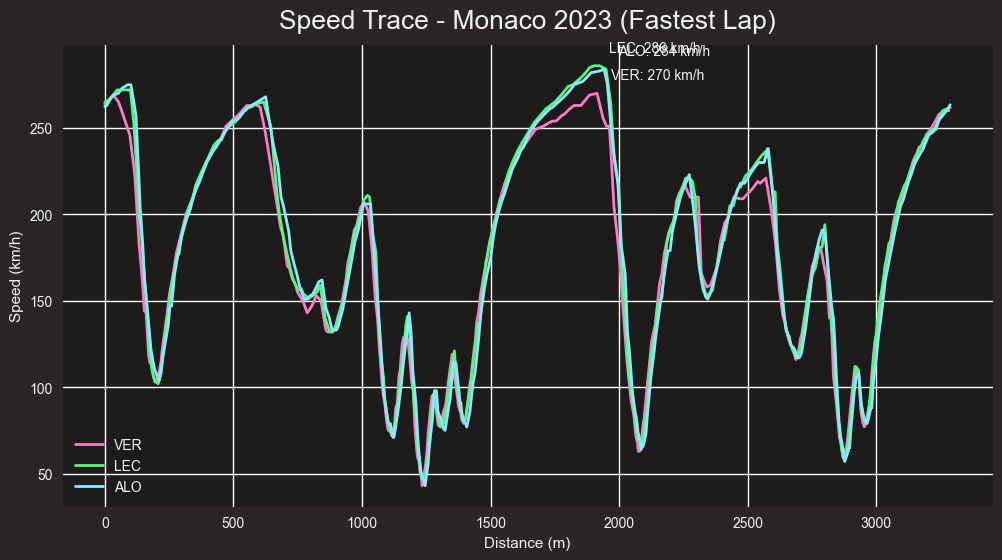

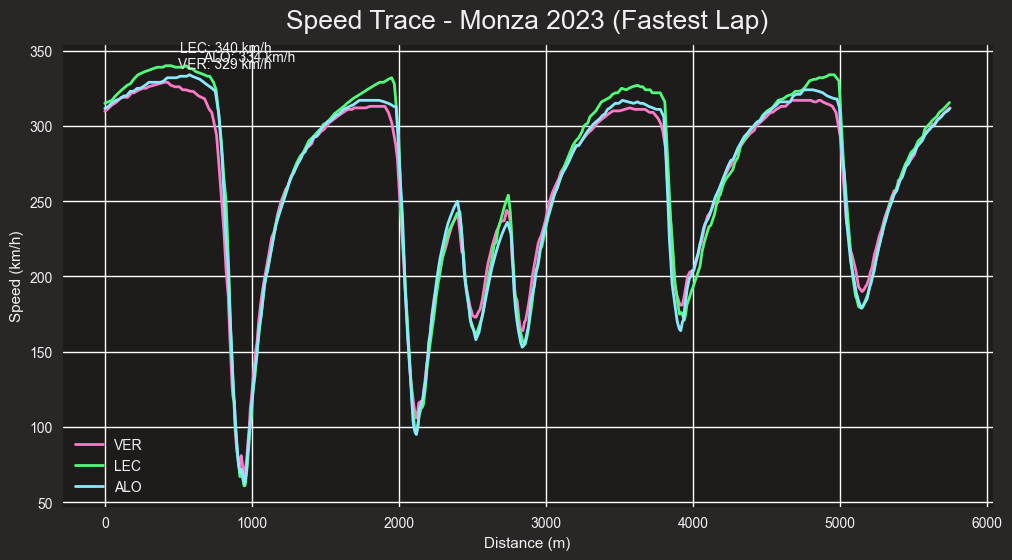

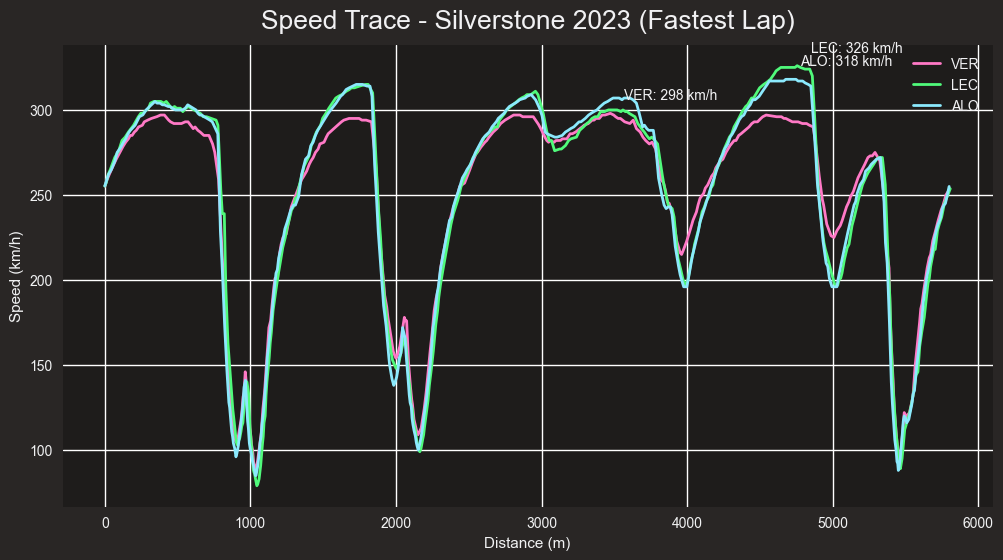

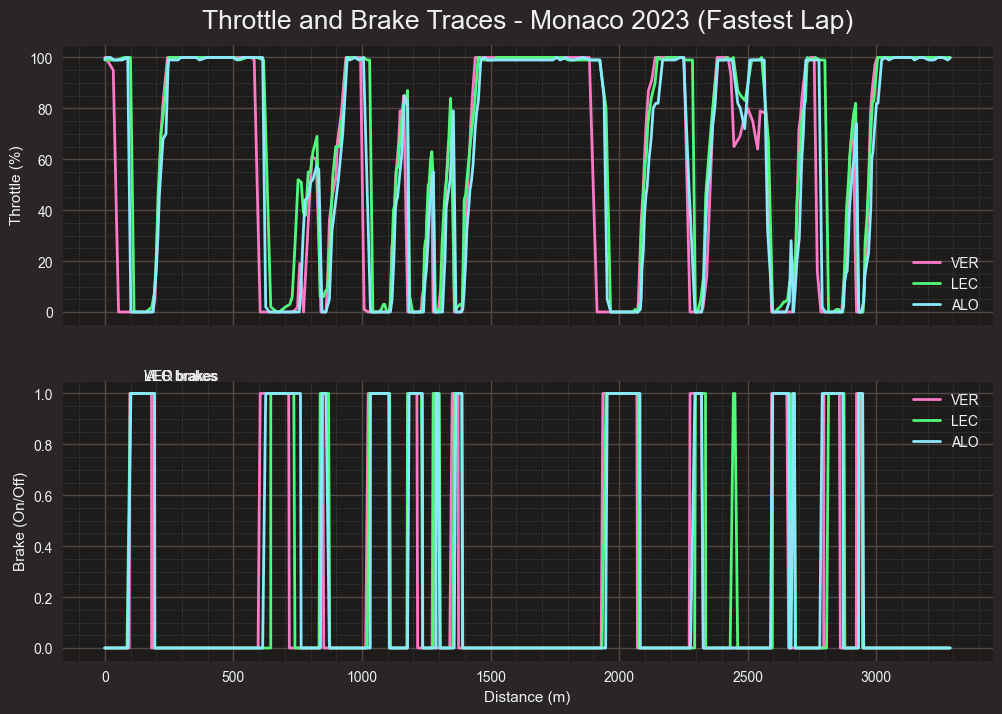

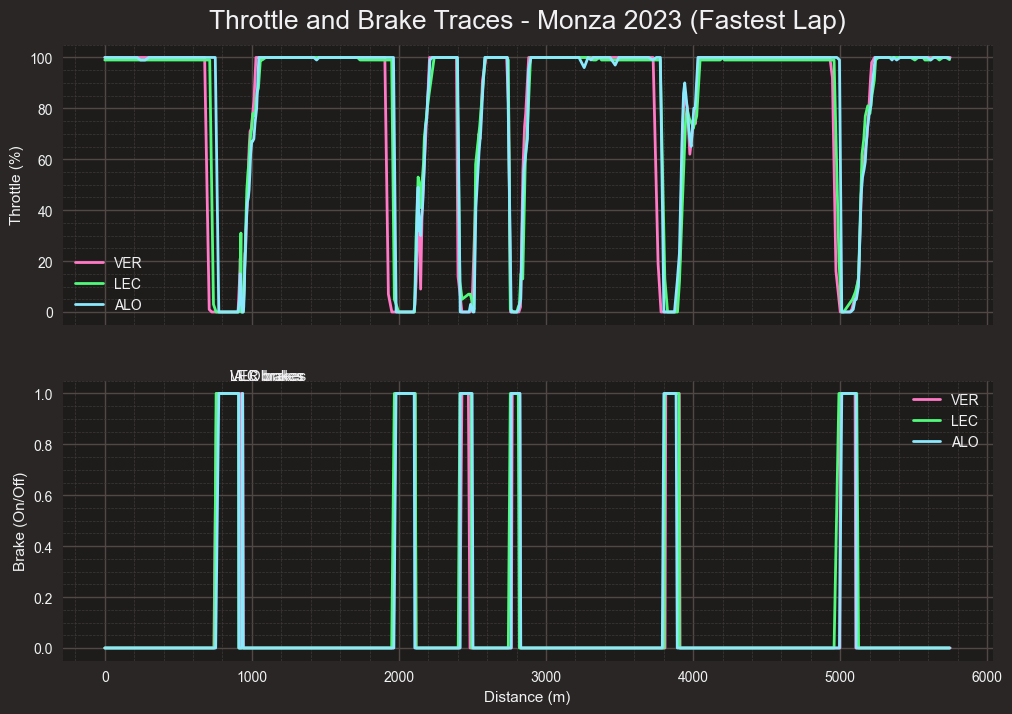

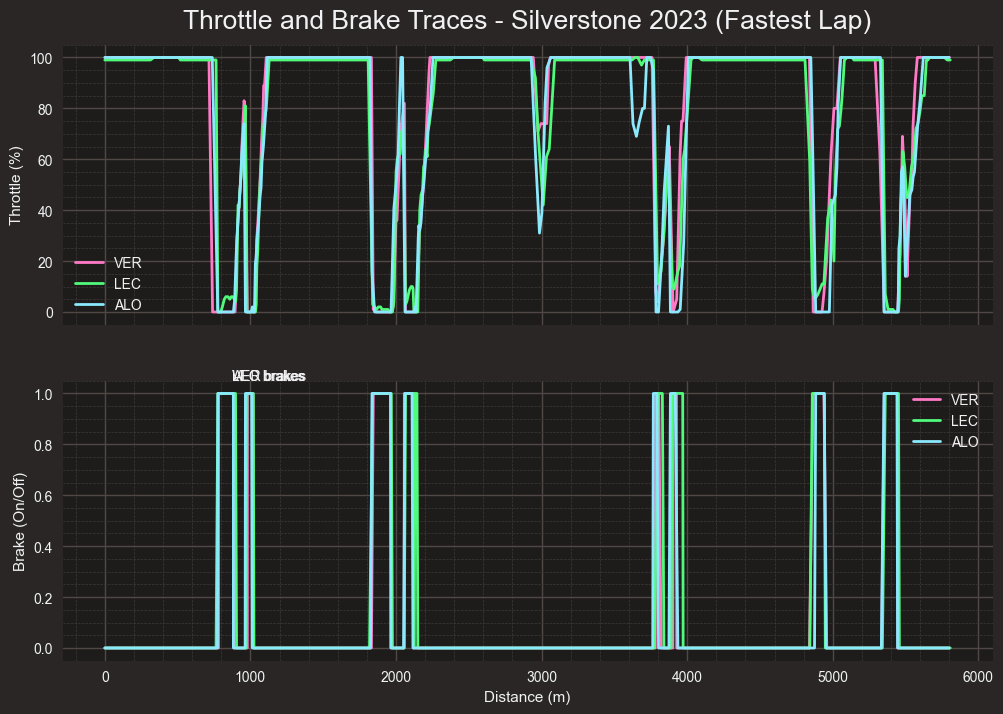

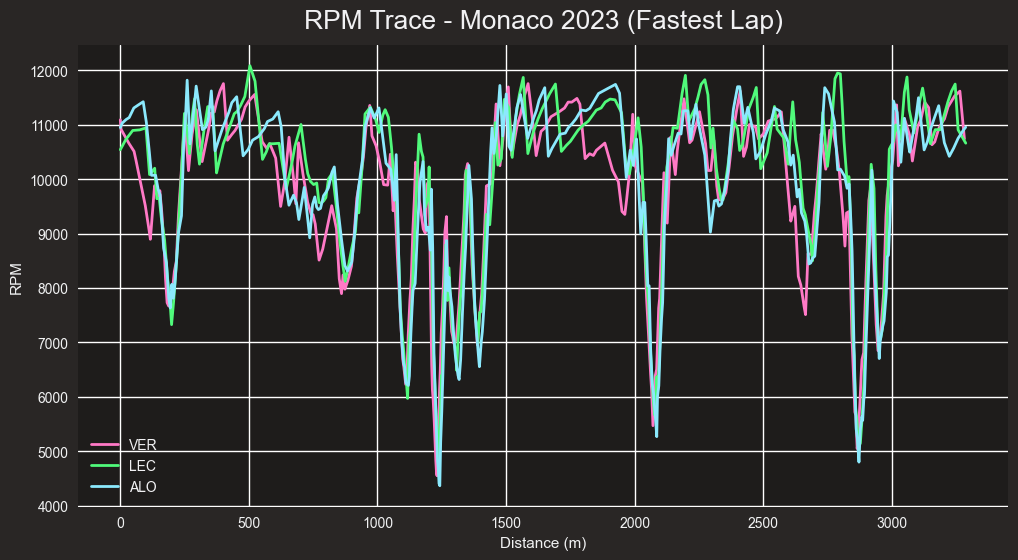

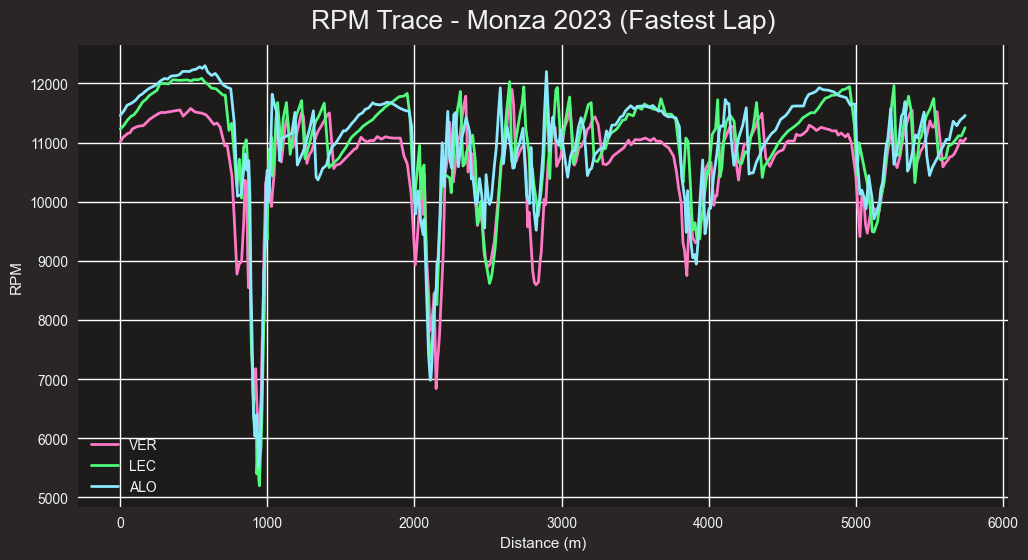

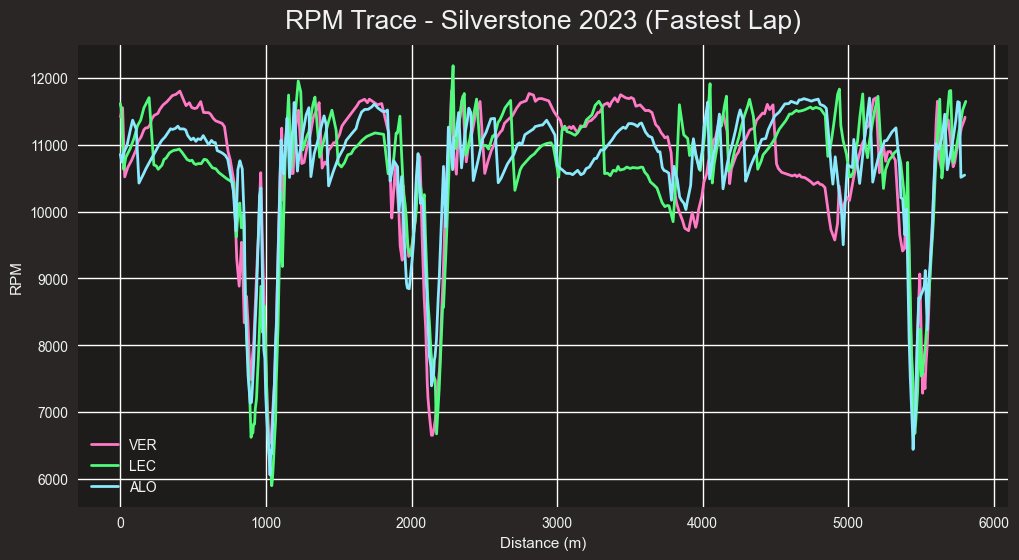

In [35]:
# Plot speed traces with annotations
for race_name in telemetry_data.keys():
    plt.figure(figsize=(12, 6))
    for driver in drivers:
        telemetry = telemetry_data[race_name][driver]
        plt.plot(telemetry['Distance'], telemetry['Speed'], label=driver, linewidth=2)
        # Annotate max speed
        max_speed_idx = telemetry['Speed'].idxmax()
        plt.annotate(f'{driver}: {telemetry.loc[max_speed_idx, "Speed"]:.0f} km/h',
                     xy=(telemetry.loc[max_speed_idx, 'Distance'], telemetry.loc[max_speed_idx, 'Speed']),
                     xytext=(10, 10), textcoords='offset points', fontsize=10)
    plt.title(f'Speed Trace - {race_name} 2023 (Fastest Lap)')
    plt.xlabel('Distance (m)')
    plt.ylabel('Speed (km/h)')
    plt.legend()
    plt.savefig(f'../plots/speed_trace_{race_name.lower()}_2023.png')
    plt.show()

# Plot throttle and brake with annotations
for race_name in telemetry_data.keys():
    fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    for driver in drivers:
        telemetry = telemetry_data[race_name][driver]
        ax[0].plot(telemetry['Distance'], telemetry['Throttle'], label=driver, linewidth=2)
        ax[1].plot(telemetry['Distance'], telemetry['Brake'], label=driver, linewidth=2)
        # Annotate first brake point (approximate Turn 1)
        brake_points = telemetry[telemetry['Brake'] > 0]
        if not brake_points.empty:
            first_brake = brake_points.iloc[0]
            ax[1].annotate(f'{driver} brakes',
                           xy=(first_brake['Distance'], first_brake['Brake']),
                           xytext=(10, 10), textcoords='offset points', fontsize=10)
    ax[0].set_title(f'Throttle and Brake Traces - {race_name} 2023 (Fastest Lap)')
    ax[0].set_ylabel('Throttle (%)')
    ax[1].set_xlabel('Distance (m)')
    ax[1].set_ylabel('Brake (On/Off)')
    ax[0].legend()
    ax[1].legend()
    plt.savefig(f'../plots/throttle_brake_trace_{race_name.lower()}_2023.png')
    plt.show()

# Plot RPM shifts
for race_name in telemetry_data.keys():
    plt.figure(figsize=(12, 6))
    for driver in drivers:
        telemetry = telemetry_data[race_name][driver]
        plt.plot(telemetry['Distance'], telemetry['RPM'], label=driver, linewidth=2)
    plt.title(f'RPM Trace - {race_name} 2023 (Fastest Lap)')
    plt.xlabel('Distance (m)')
    plt.ylabel('RPM')
    plt.legend()
    plt.savefig(f'../plots/rpm_trace_{race_name.lower()}_2023.png')
    plt.show()

## Throttle Distribution
Visualize throttle usage distribution (0–20%, 20–80%, 80–100%).

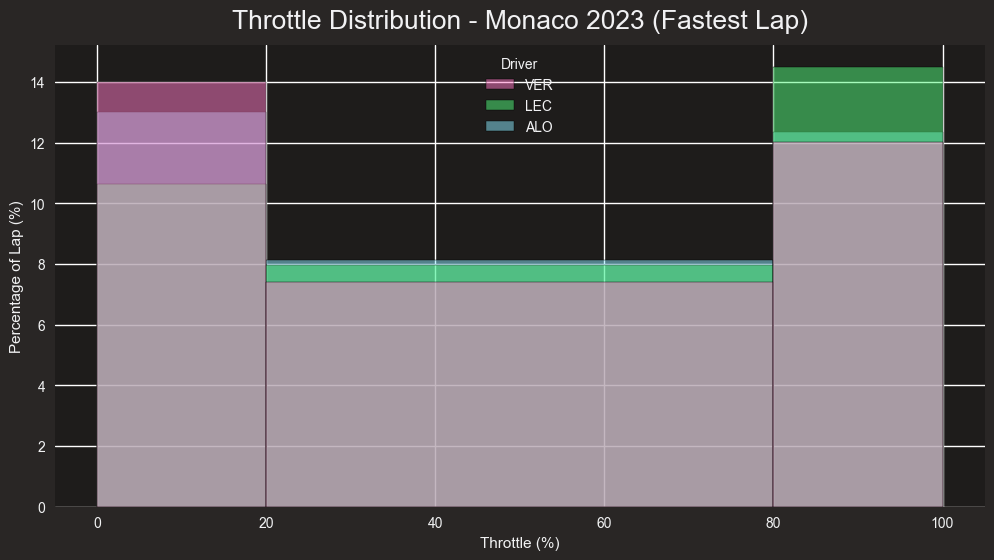

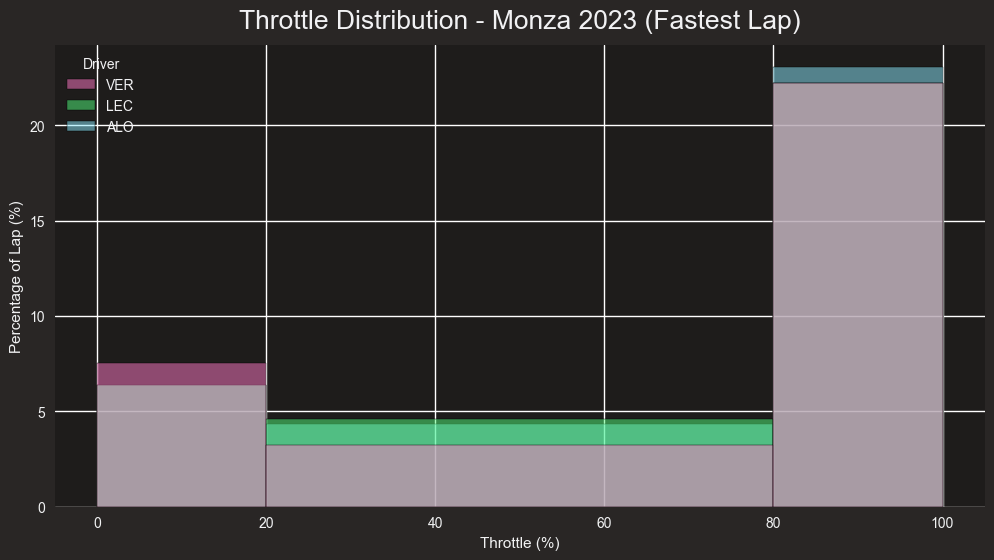

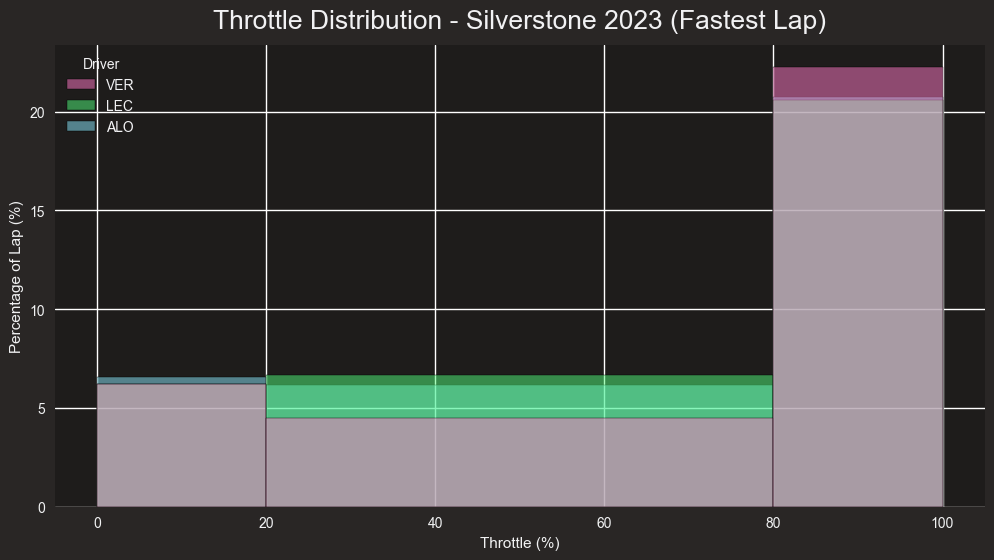

In [36]:
for race_name in telemetry_data.keys():
    plt.figure(figsize=(12, 6))
    # Combine all driver data for this race
    combined_data = []
    for driver in drivers:
        telemetry = telemetry_data[race_name][driver]
        driver_data = pd.DataFrame({
            'Throttle': telemetry['Throttle'],
            'Driver': driver
        })
        combined_data.append(driver_data)
    
    race_data = pd.concat(combined_data, ignore_index=True)
    
    bins = [0, 20, 80, 100]
    sns.histplot(data=race_data, x='Throttle', hue='Driver', bins=bins, 
                 stat='percent', alpha=0.5, multiple='layer')  
    plt.title(f'Throttle Distribution - {race_name} 2023 (Fastest Lap)')
    plt.xlabel('Throttle (%)')
    plt.ylabel('Percentage of Lap (%)')
    plt.savefig(f'../plots/throttle_distribution_{race_name.lower()}_2023.png')
    plt.show()

## DRS and Speed Delta Analysis
Analyze speed differences in DRS zones.

DRS Speed Metrics:
          Race Driver  DRS_Speed_Avg  Non_DRS_Speed_Avg  Speed_Delta
0       Monaco    VER            NaN         154.466386          NaN
1       Monaco    LEC            NaN         157.929595          NaN
2       Monaco    ALO            NaN         154.207366          NaN
3        Monza    VER            NaN         242.007681          NaN
4        Monza    LEC     315.822646         220.171280    95.651367
5        Monza    ALO            NaN         240.065644          NaN
6  Silverstone    VER            NaN         230.999419          NaN
7  Silverstone    LEC     238.421431         224.840821    13.580610
8  Silverstone    ALO     241.363144         224.031989    17.331155


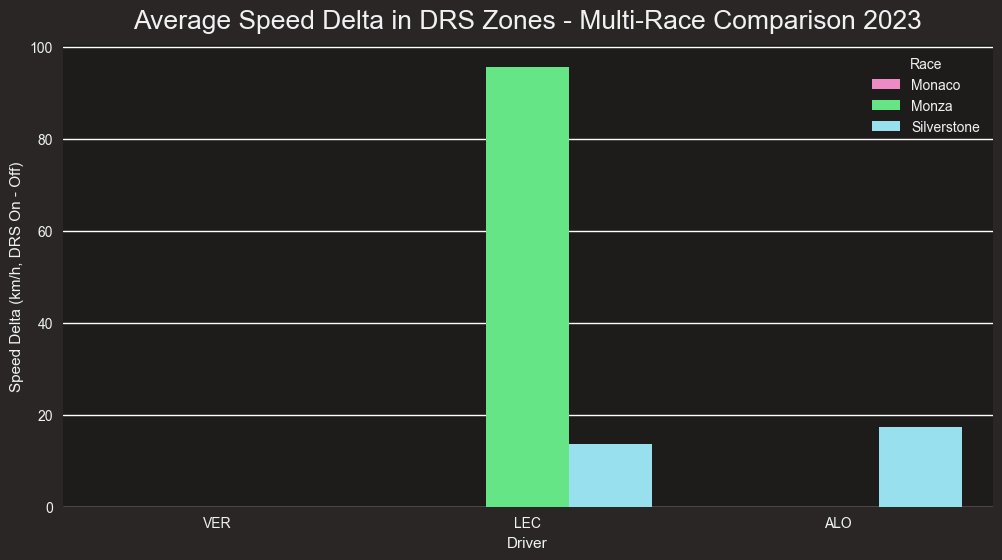

In [37]:
# DRS speed delta
drs_metrics = []

for race_name in telemetry_data.keys():
    for driver in drivers:
        telemetry = telemetry_data[race_name][driver]
        drs_on = telemetry[telemetry['DRS'] > 0]
        drs_off = telemetry[telemetry['DRS'] == 0]
        drs_metrics.append({
            'Race': race_name,
            'Driver': driver,
            'DRS_Speed_Avg': drs_on['Speed'].mean() if not drs_on.empty else np.nan,
            'Non_DRS_Speed_Avg': drs_off['Speed'].mean() if not drs_off.empty else np.nan,
            'Speed_Delta': drs_on['Speed'].mean() - drs_off['Speed'].mean() if not (drs_on.empty or drs_off.empty) else np.nan
        })

# Save DRS metrics
drs_metrics_df = pd.DataFrame(drs_metrics)
drs_metrics_df.to_csv('../data/drs_metrics_2023.csv', index=False)
print('DRS Speed Metrics:')
print(drs_metrics_df)

# Plot DRS speed delta
plt.figure(figsize=(12, 6))
sns.barplot(x='Driver', y='Speed_Delta', hue='Race', data=drs_metrics_df)
plt.title('Average Speed Delta in DRS Zones - Multi-Race Comparison 2023')
plt.ylabel('Speed Delta (km/h, DRS On - Off)')
plt.savefig('../plots/drs_speed_delta_2023.png')
plt.show()

## Summary Statistics
Enhanced summary with lap times, max speed, and telemetry stats.

Summary Statistics:
          Race Driver  LapTime  Max_Speed   Avg_Speed  Avg_Throttle  \
0       Monaco    VER   76.604      270.0  154.466386     47.761063   
1       Monaco    LEC   75.773      286.0  157.929595     56.319884   
2       Monaco    ALO   76.674      284.0  154.207366     48.649720   
3        Monza    VER   85.240      329.0  242.007681     72.779266   
4        Monza    LEC   85.580      340.0  242.370740     74.942371   
5        Monza    ALO   86.105      334.0  240.065644     75.085532   
6  Silverstone    VER   90.275      298.0  230.999419     74.439846   
7  Silverstone    LEC   91.255      326.0  228.789793     72.595281   
8  Silverstone    ALO   91.338      318.0  229.243627     71.093248   

   Brake_Percentage       Avg_RPM  Max_RPM  DRS_Usage  
0         24.740484   9337.048061  11756.0   0.000000  
1         30.017452   9581.007906  12085.0   0.000000  
2         28.103448   9343.251614  11819.0   0.000000  
3         15.962441  10389.636531  11898.0   

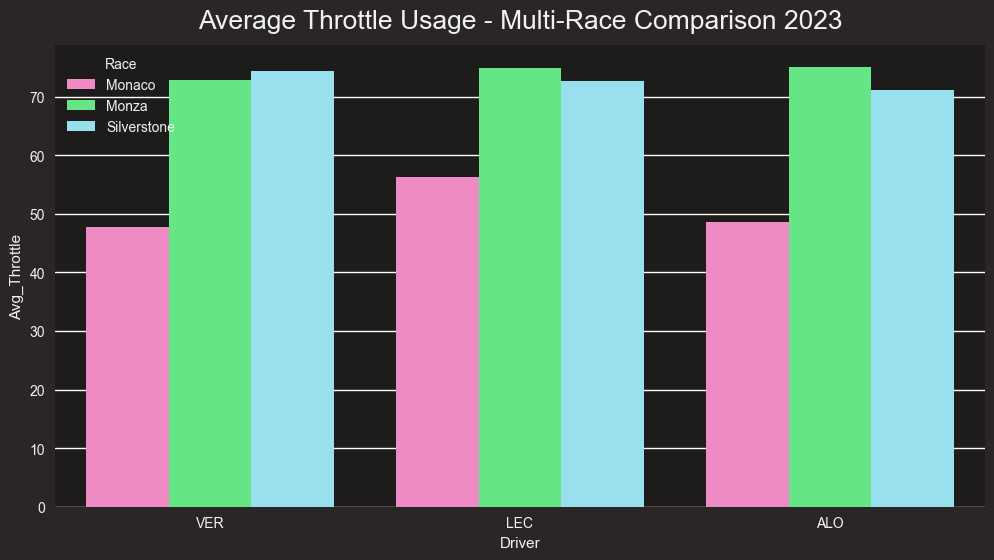

Monaco - VER Telemetry Description:
            Speed    Throttle           RPM
count  578.000000  578.000000    578.000000
mean   154.466386   47.761063   9337.048061
std     64.355518   43.578153   1698.340532
min     43.000000    0.000000   4548.000000
25%     95.000000    0.000000   8146.638054
50%    148.929998   43.444783   9754.349882
75%    209.575000  100.000000  10732.071787
max    270.000000  100.000000  11756.000000
Monaco - LEC Telemetry Description:
            Speed    Throttle           RPM
count  573.000000  573.000000    573.000000
mean   157.929595   56.319884   9581.007906
std     66.485489   41.930825   1769.019481
min     46.000000    0.000000   4787.000000
25%     96.642857    4.000000   8403.000000
50%    153.000000   65.000000  10198.000000
75%    213.000000   99.575001  10923.000000
max    286.000000  100.000000  12085.000000
Monaco - ALO Telemetry Description:
            Speed    Throttle           RPM
count  580.000000  580.000000    580.000000
mean   154.2

In [38]:
# Enhanced summary statistics
summary_stats = []

for race_name in telemetry_data.keys():
    for driver in drivers:
        telemetry = telemetry_data[race_name][driver]
        lap_info = lap_sector_df[(lap_sector_df['Race'] == race_name) & (lap_sector_df['Driver'] == driver)]
        stats = {
            'Race': race_name,
            'Driver': driver,
            'LapTime': lap_info['LapTime'].iloc[0] if not lap_info.empty else np.nan,
            'Max_Speed': telemetry['Speed'].max(),
            'Avg_Speed': telemetry['Speed'].mean(),
            'Avg_Throttle': telemetry['Throttle'].mean(),
            'Brake_Percentage': (telemetry['Brake'] > 0).mean() * 100,
            'Avg_RPM': telemetry['RPM'].mean(),
            'Max_RPM': telemetry['RPM'].max(),
            'DRS_Usage': (telemetry['DRS'] > 0).mean() * 100
        }
        summary_stats.append(stats)

# Save summary
summary_df = pd.DataFrame(summary_stats)
summary_df.to_csv('../data/summary_stats_multirace_2023.csv', index=False)
print('Summary Statistics:')
print(summary_df)

# Plot average throttle
plt.figure(figsize=(12, 6))
sns.barplot(x='Driver', y='Avg_Throttle', hue='Race', data=summary_df)
plt.title('Average Throttle Usage - Multi-Race Comparison 2023')
plt.savefig('../plots/avg_throttle_multirace_2023.png')
plt.show()

# Telemetry description
for race_name in telemetry_data.keys():
    for driver in drivers:
        print(f'{race_name} - {driver} Telemetry Description:')
        print(telemetry_data[race_name][driver][['Speed', 'Throttle', 'RPM']].describe())

## Consolidated Dataset
Combine telemetry data for feature engineering.

In [39]:
# Concatenate all telemetry
all_telemetry = []
for race_name in telemetry_data.keys():
    for driver in drivers:
        all_telemetry.append(telemetry_data[race_name][driver])
combined_telemetry = pd.concat(all_telemetry, ignore_index=True)
combined_telemetry.to_csv('../data/combined_telemetry_2023.csv', index=False)
print('Saved combined telemetry to data/ folder')

Saved combined telemetry to data/ folder


## Linking to Phase 2
This EDA lays the foundation for feature engineering in Phase 2. Derived metrics like **% lap at >95% throttle, brake duration per km, and speed std dev per sector** will be expanded with features such as throttle application rate, coasting time, and lap consistency. Sector breakdowns enable track-specific behavioral analysis, feeding into clustering algorithms (KMeans, DBSCAN, Hierarchical) to identify driver styles (e.g., aggressive vs. smooth). The consolidated dataset (`combined_telemetry_2023.csv`) and derived metrics tables will streamline feature extraction, ensuring robust inputs for unsupervised learning.

## Notes
- **Steering Data**: FastF1 does not provide steering angle. Speed variability per sector is used as a proxy for driving line consistency.
